# Dataset Arbol Decisión

### winequality-red

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
# Cargar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [3]:
# Cargar el dataset
dfVino = pd.read_csv('winequality-red.csv')
dfVino.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Reevisamos las columnas para luego cambiar los nombres a español y hacer mas comodo el trabajo
print(dfVino.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
# Se define un nuevo conjunto de nombres para las columnas
columnasEspanol = {'fixed acidity': 'acidezFija', 'volatile acidity':'acidezVolatil', 'citric acid': 'acidoCitrico', 
                   'residual sugar': 'azucarResidual','chlorides':'cloruros' ,'free sulfur dioxide': 'dioxidoDeAzufreLibre',
                   'total sulfur dioxide':'dioxidoDeAzufreTotal', 'density':'densidad', 'pH':'ph', 'sulphates':'sulfatos', 
                   'alcohol':'alcohol', 'quality':'calidad'}
# Se renombran las columnas
dfVino = dfVino.rename(columns=columnasEspanol)

In [6]:
# confirmar el cambio en los encabezados de columna
dfVino.head(5)

,acidezFija,acidezVolatil,acidoCitrico,azucarResidual,cloruros,dioxidoDeAzufreLibre,dioxidoDeAzufreTotal,densidad,ph,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Descripción de las variables:

**- Acidez fija:** Se refiere a la cantidad de ácidos no volátiles presentes en el vino. Estos ácidos contribuyen a la percepción del sabor y a la estabilidad del vino.

**- Acidez volátil:** Es la cantidad de ácidos volátiles presentes en el vino. Un nivel alto de acidez volátil puede contribuir a aromas no deseados, como el vinagre.

**- Ácido cítrico:** Es un tipo de ácido orgánico presente en el vino que puede afectar su sabor y acidez.

**- Azúcar residual:** Es la cantidad de azúcar que queda en el vino después de la fermentación. Un nivel alto de azúcar residual puede dar lugar a un vino más dulce.

**- Cloruros:** Son sales de cloro que pueden estar presentes en el vino. La concentración de cloruros puede afectar al sabor y la calidad del vino.

**- Dióxido de azufre libre:** Es una forma de azufre utilizada en la vinificación para prevenir la oxidación y el crecimiento microbiano no deseado.

**- Dióxido de azufre total:** Es la suma del dióxido de azufre libre y el dióxido de azufre ligado. También se utiliza como conservante en el vino.

**- Densidad:** Es la masa por unidad de volumen del vino. La densidad puede estar relacionada con la concentración de azúcar y alcohol en el vino.

**- pH:** Es una medida de la acidez o alcalinidad del vino. Un pH bajo indica mayor acidez, mientras que un pH alto indica menor acidez.

**- Sulfatos:** Son sales de ácido sulfúrico que pueden añadirse al vino como conservantes.

**- Alcohol:** Es el componente del vino que se produce mediante la fermentación de los azúcares presentes en la uva. El nivel de alcohol puede influir en el sabor, la textura y la sensación en boca del vino.

**- Calidad:** Se refiere a la evaluación global del vino, que puede basarse en diversos factores como el sabor, el aroma, la textura y la estructura. La calidad puede ser subjetiva y puede variar según los gustos individuales y los estándares de cada persona.


In [7]:
#Revisamos que los datos esten completos y luego vemos la descripción estadistica de los datos
dfVino.shape

(1599, 12)

In [8]:
dfVino.describe()

,acidezFija,acidezVolatil,acidoCitrico,azucarResidual,cloruros,dioxidoDeAzufreLibre,dioxidoDeAzufreTotal,densidad,ph,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#Confirmamos si hay datos faltantes, en este caso no los hay
dfVino.isna().sum()

acidezFija              0
acidezVolatil           0
acidoCitrico            0
azucarResidual          0
cloruros                0
dioxidoDeAzufreLibre    0
dioxidoDeAzufreTotal    0
densidad                0
ph                      0
sulfatos                0
alcohol                 0
calidad                 0
dtype: int64

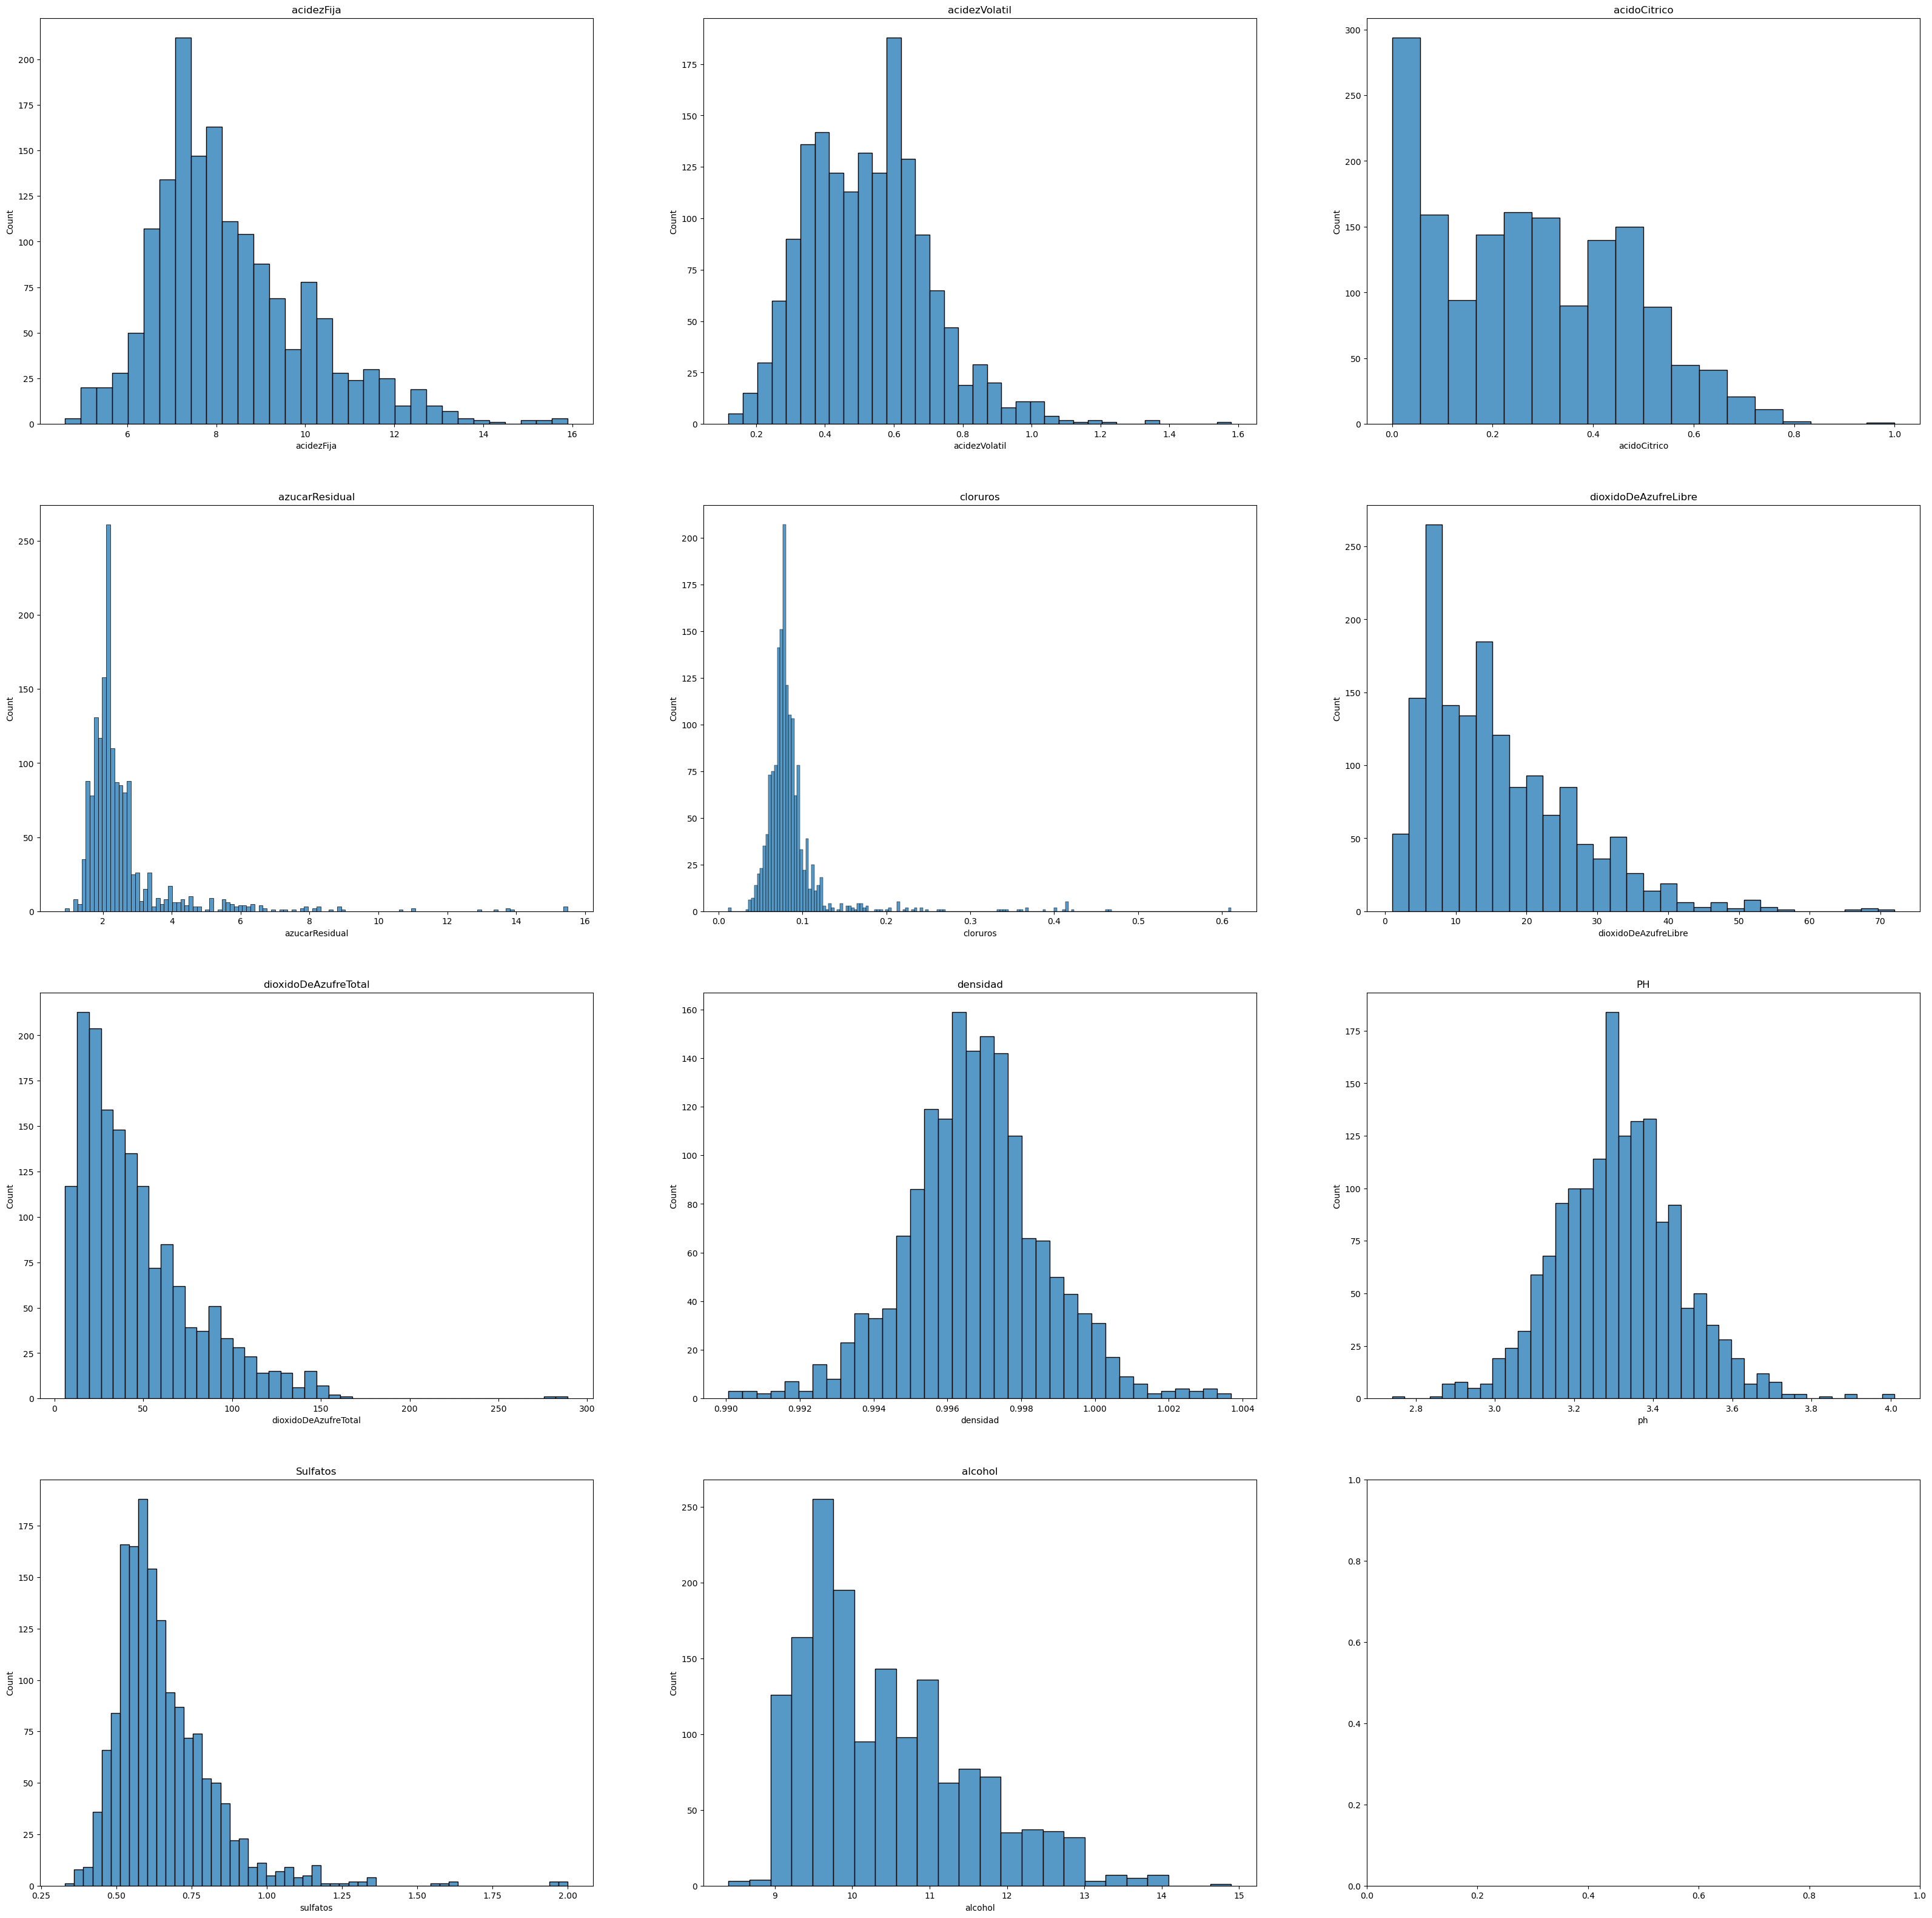

In [73]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

fig, axes = plt.subplots(4, 3, figsize = (40, 40))
sns.histplot(ax = axes[0, 0], x = dfVino["acidezFija"]).set(title = "acidezFija");
sns.histplot(ax = axes[0, 1], x = dfVino["acidezVolatil"]).set(title = "acidezVolatil");
sns.histplot(ax = axes[0, 2], x = dfVino["acidoCitrico"]).set(title = "acidoCitrico");
sns.histplot(ax = axes[1, 0], x = dfVino["azucarResidual"]).set(title = "azucarResidual");
sns.histplot(ax = axes[1, 1], x = dfVino["cloruros"]).set(title = "cloruros");
sns.histplot(ax = axes[1, 2], x = dfVino["dioxidoDeAzufreLibre"]).set(title = "dioxidoDeAzufreLibre");
sns.histplot(ax = axes[2, 0], x = dfVino["dioxidoDeAzufreTotal"]).set(title = "dioxidoDeAzufreTotal");
sns.histplot(ax = axes[2, 1], x = dfVino["densidad"]).set(title = "densidad");
sns.histplot(ax = axes[2, 2], x = dfVino["ph"]).set(title = "PH");
sns.histplot(ax = axes[3, 0], x = dfVino["sulfatos"]).set(title = "Sulfatos");
sns.histplot(ax = axes[3, 1], x = dfVino["alcohol"]).set(title = "alcohol");


In [10]:
dfVino['calidad'].value_counts()

calidad
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

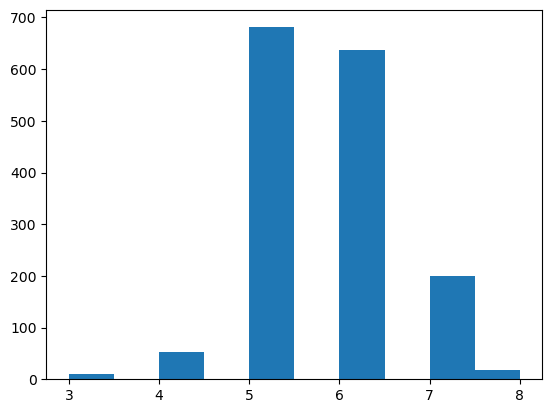

In [11]:
plt.hist(dfVino.calidad)

Podemos darnos cuenta que el dataset **no esta bien equilibrado**, dado que hay un gran numero de datos de calidad 5 y 6  que podrian ser catalogados como vinos de calidad media, se esperaba tener un puntaje del 1 al 10 para la calidad, pero no se tienen muestras de una calidad muy alta, ni de una calidad muy baja, si revisamos los demas datos su distribución tampoco se ve normalizada, puede que el PH y la densidad esten relacionados con la calidad, dado que vemos una distribución similar, puede que tengamos que dividir los datos de calidad en solamente dos valores, siendo buenos y malos vinos.

In [12]:
#Revisamos correlaciones entre las variables
predictors_col = ['acidezFija','acidezVolatil', 'acidoCitrico', 'azucarResidual', 'cloruros', 'dioxidoDeAzufreLibre', 'dioxidoDeAzufreTotal','densidad','ph', 'sulfatos','alcohol']
target_col = ['calidad']

In [13]:
predictors = dfVino[predictors_col]
target = dfVino[target_col]

<Axes: >

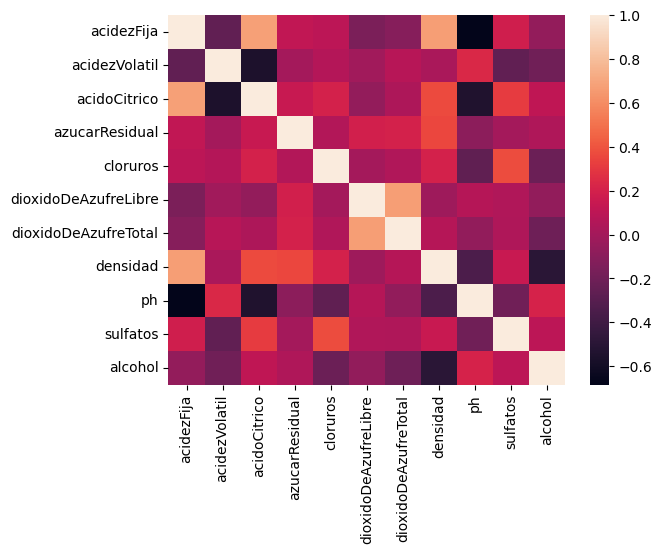

In [77]:
corr = predictors.corr()
sns.heatmap(corr)

Hay una correlación entre la densidad y e acido citrico, con la acidez fija, vemos que casi no hay ninguna correlación entre el PH, la acidez fija y el acido citrico, asi omo entre el acito citrico y la acidez volatil, se debe analizar si estas tienen relación con la calidad que es la variable objetivo 

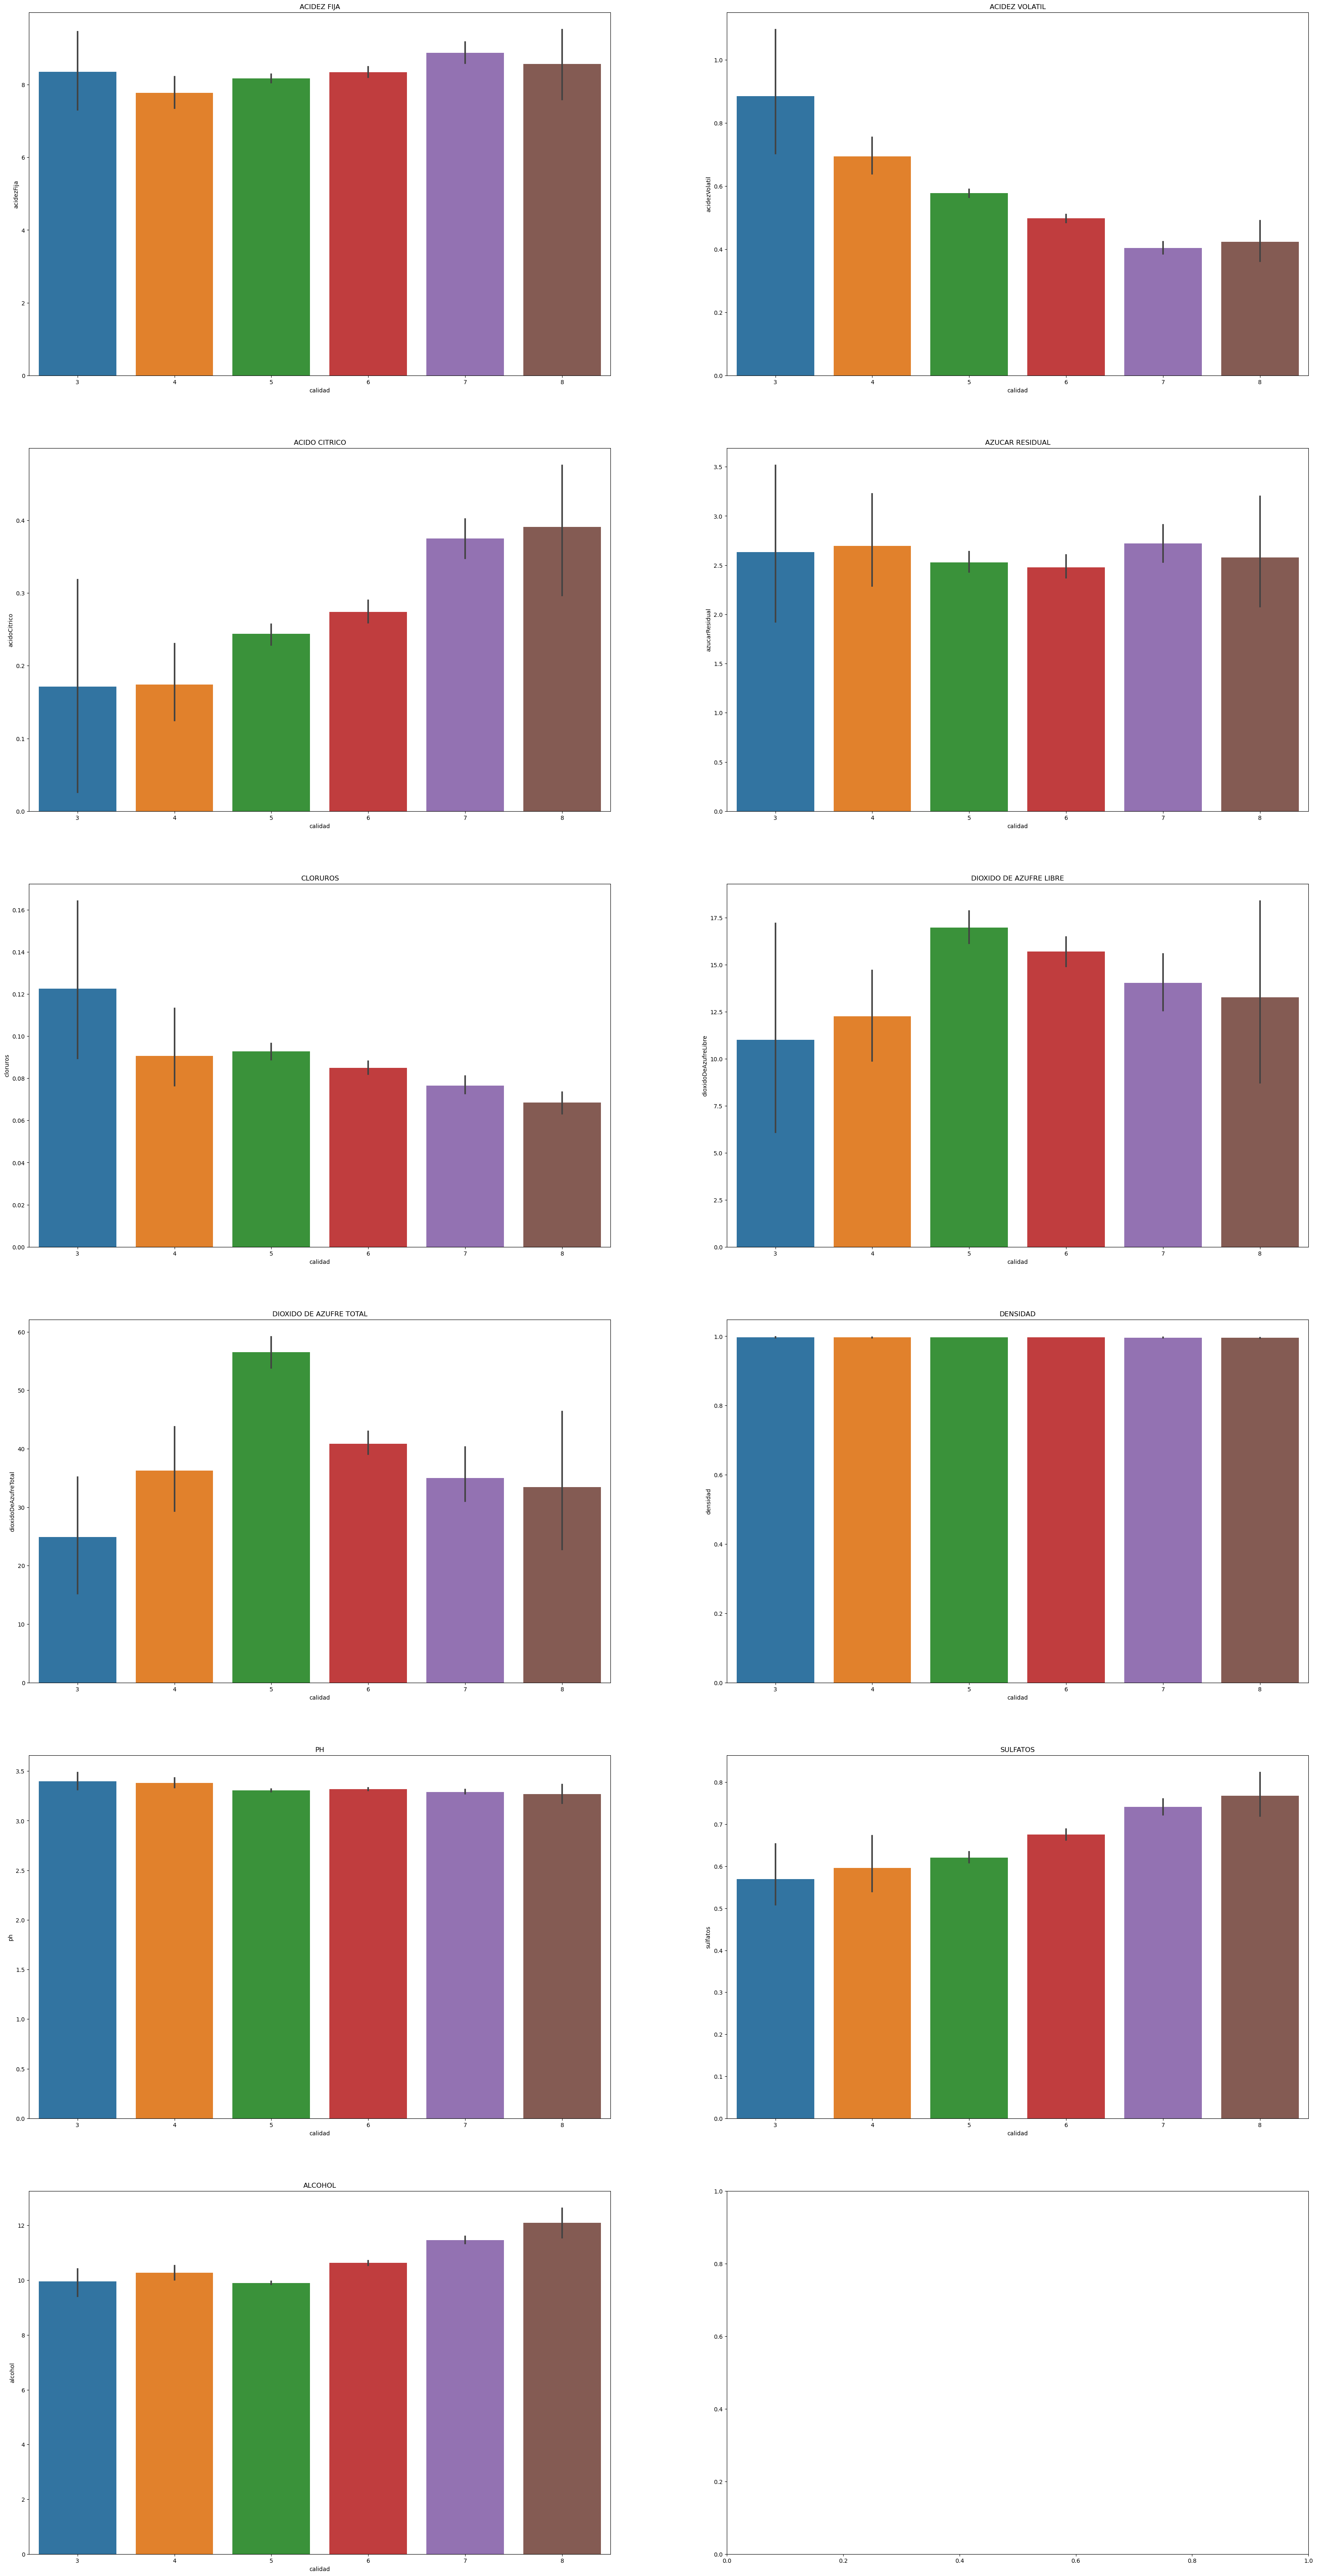

In [14]:
#Comparamos nuestra variable objetivo con las demas, para ver si hay alguna relación
fig, axes = plt.subplots(6, 2, figsize = (40, 80))
sns.barplot(ax = axes[0, 0], x = 'calidad', y = 'acidezFija', data = dfVino).set(title = "ACIDEZ FIJA");
sns.barplot(ax = axes[0, 1], x = 'calidad', y = 'acidezVolatil', data = dfVino).set(title = "ACIDEZ VOLATIL");
sns.barplot(ax = axes[1, 0], x = 'calidad', y = 'acidoCitrico', data = dfVino).set(title = "ACIDO CITRICO");
sns.barplot(ax = axes[1, 1], x = 'calidad', y = 'azucarResidual', data = dfVino).set(title = "AZUCAR RESIDUAL");
sns.barplot(ax = axes[2, 0], x = 'calidad', y = 'cloruros', data = dfVino).set(title = "CLORUROS");
sns.barplot(ax = axes[2, 1], x = 'calidad', y = 'dioxidoDeAzufreLibre', data = dfVino).set(title = "DIOXIDO DE AZUFRE LIBRE");
sns.barplot(ax = axes[3, 0], x = 'calidad', y = 'dioxidoDeAzufreTotal', data = dfVino).set(title = "DIOXIDO DE AZUFRE TOTAL");
sns.barplot(ax = axes[3, 1], x = 'calidad', y = 'densidad', data = dfVino).set(title = "DENSIDAD");
sns.barplot(ax = axes[4, 0], x = 'calidad', y = 'ph', data = dfVino).set(title = "PH");
sns.barplot(ax = axes[4, 1], x = 'calidad', y = 'sulfatos', data = dfVino).set(title = "SULFATOS");
sns.barplot(ax = axes[5, 0], x = 'calidad', y = 'alcohol', data = dfVino).set(title = "ALCOHOL");

Revisando las relaciones podemos determinar que la calidad del vino tiene las posibles siguientes relaciones:
- La 'acidez fija' parece no determinar la calidad del vino
- Se puede creer que a mayor 'acidez volatil' menor es la calidad del vino
- Al parecer el 'acido citrico' detemina la calidad del vino, sin embargo parecen haber muchos valore atipicos en el modelo
- El 'azucar residual' parece no ser significativo
- los 'cloruros' parecen tener relación con un vino de mala calidad
- Teniendo en cuenta el numero de muestras, el 'dioxido de azufre libre' no determina la calidad del vino
- El 'dioxido de azufre total tampoco parece incidir, esto teniendo en cuenta la calidad de muestras de vinos con score 5 y 6
- La densidad y el ph no parece ser significativos
- La cantidad de sulfatos puede simbolizar una buena calidad de vino
- El nivel de alcohol parece ser tambien indicativo de un vino de buena calidad

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

En la linea 13 ya confirmamos que no hay datos faltantes en el modelo, sin embargo pudimos confirmar una gran cantidad de valores atipicos, para su visualización e interpretación usaremos diagramas de caja, y luego aplicaremos el metodo del rango Inter-Quartile (IQR) para transformar estos valores y lograr mayor presición.

In [15]:
#Confirmamos si hay datos faltantes, en este caso no los hay
dfVino.isna().sum()

acidezFija              0
acidezVolatil           0
acidoCitrico            0
azucarResidual          0
cloruros                0
dioxidoDeAzufreLibre    0
dioxidoDeAzufreTotal    0
densidad                0
ph                      0
sulfatos                0
alcohol                 0
calidad                 0
dtype: int64

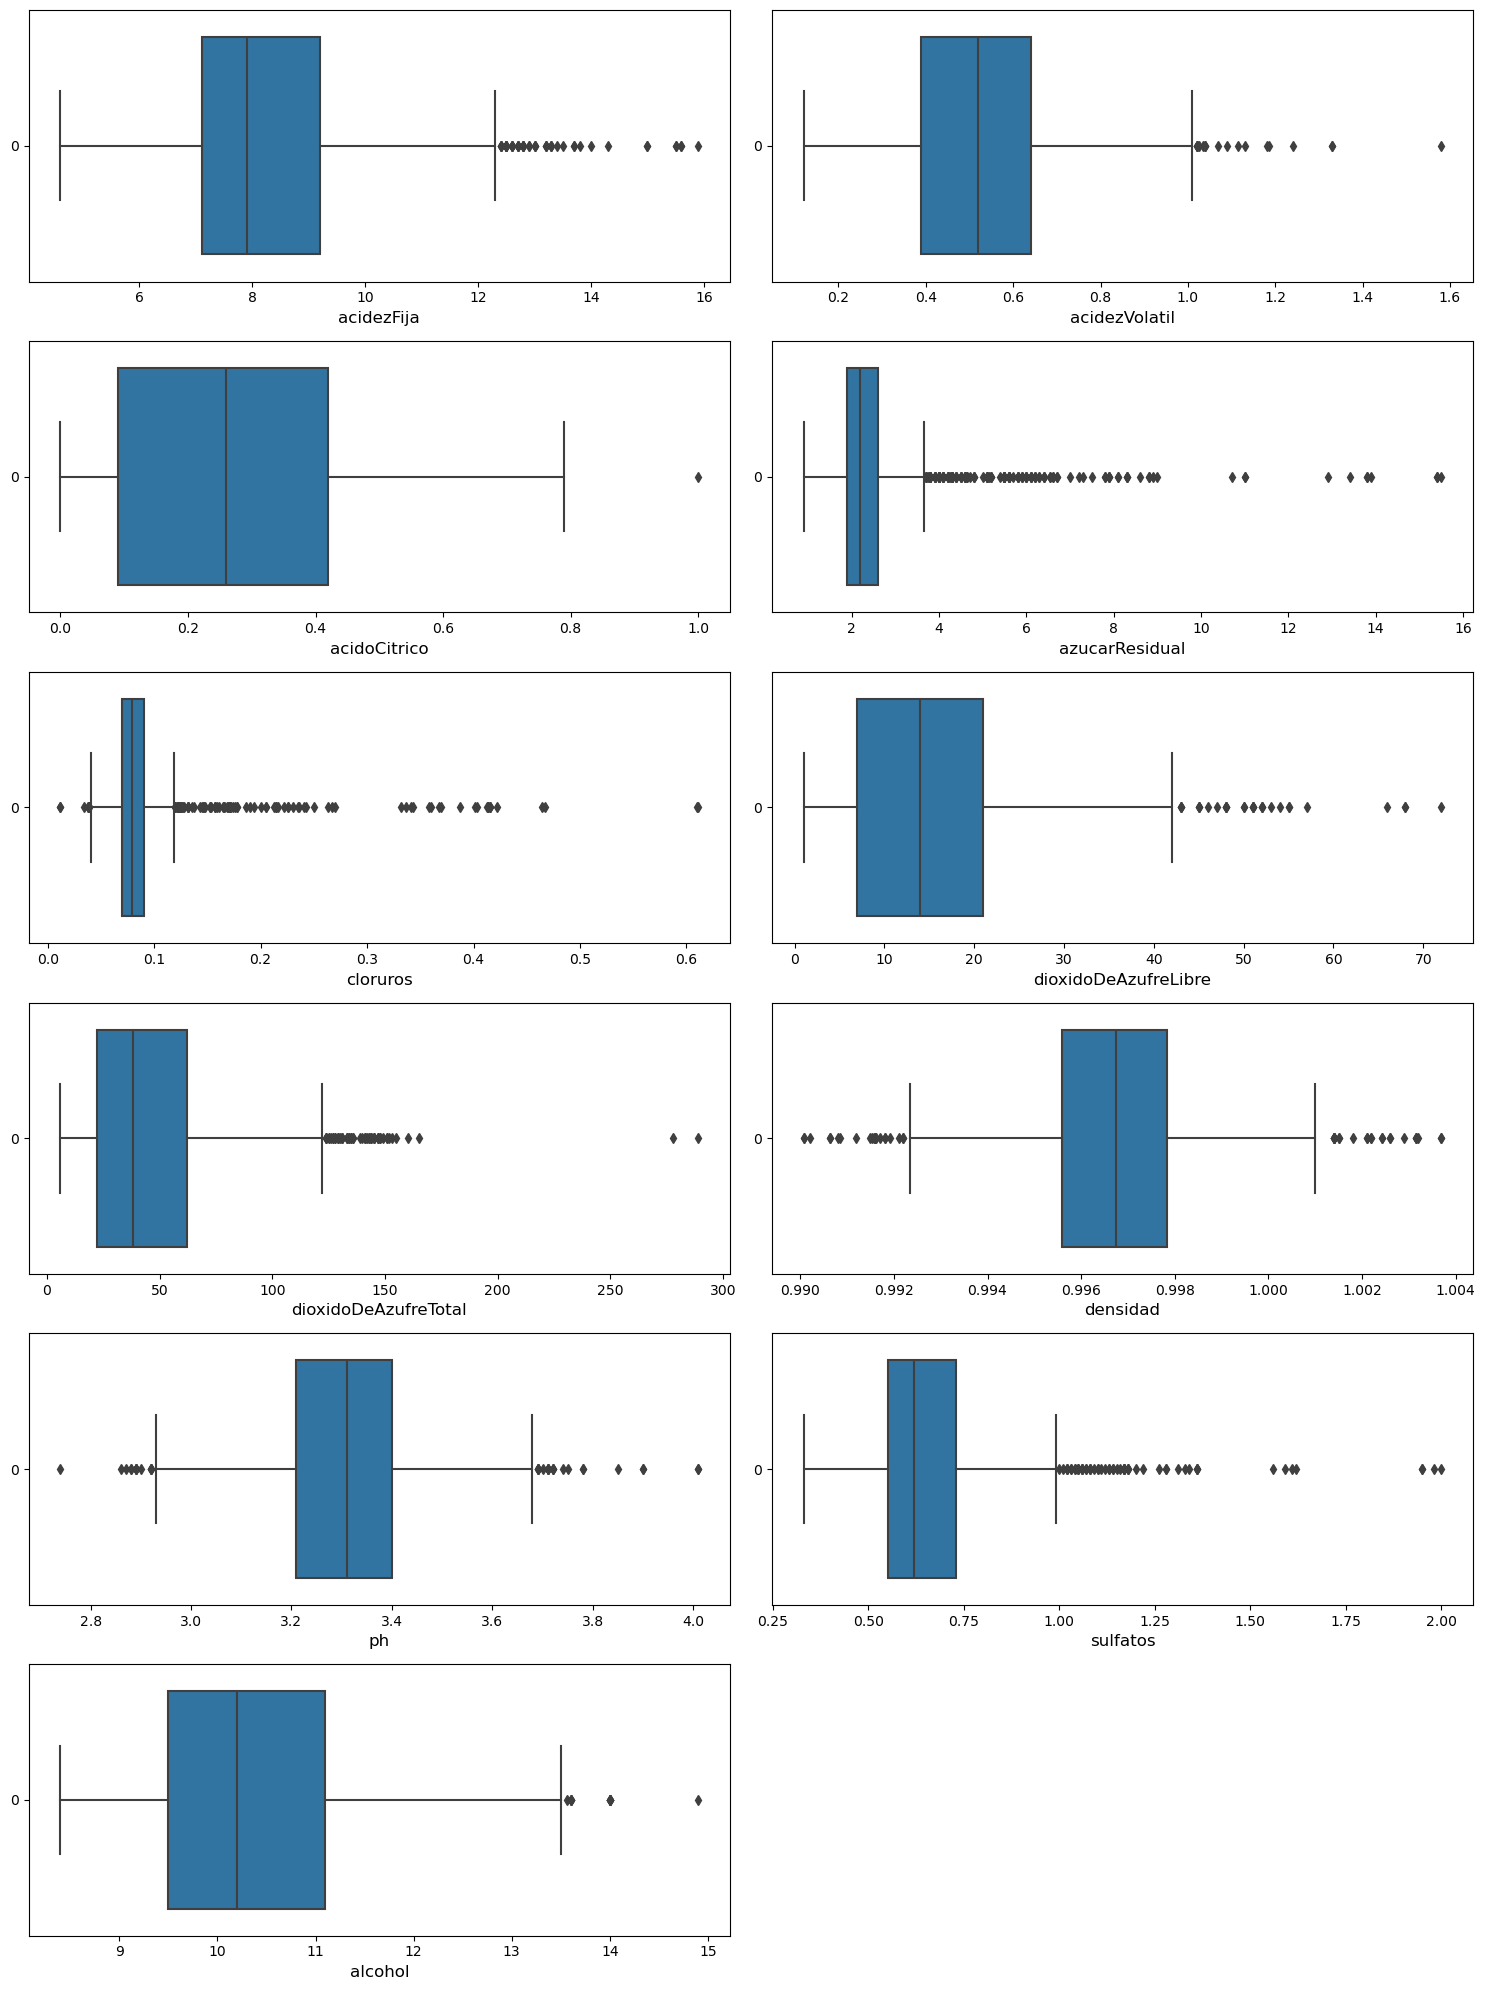

In [16]:
fig, axs = plt.subplots(6, 2, figsize=(15, 20))  # Mantenemos la disposición de filas y columnas

# Crear boxplot para 'acidezFija'
sns.boxplot(dfVino['acidezFija'], ax=axs[0, 0], orient='h')
axs[0, 0].set_xlabel('acidezFija', fontsize=12)  # Cambiamos a 'xlabel'

# Crear gráfico de barras para 'acidezVolatil'
sns.boxplot(dfVino['acidezVolatil'], ax=axs[0, 1], orient='h')
axs[0, 1].set_xlabel('acidezVolatil', fontsize=12)  # Cambiamos a 'xlabel'

# Crear gráfico de barras para 'acidoCitrico'
sns.boxplot(dfVino['acidoCitrico'], ax=axs[1, 0], orient='h')
axs[1, 0].set_xlabel('acidoCitrico', fontsize=12)  # Cambiamos a 'xlabel'

# Crear boxplot para 'azucarResidual'
sns.boxplot(dfVino['azucarResidual'], ax=axs[1, 1], orient='h')
axs[1, 1].set_xlabel('azucarResidual', fontsize=12)  # Cambiamos a 'xlabel'

# Crear boxplot para 'cloruros'
sns.boxplot(dfVino['cloruros'], ax=axs[2, 0], orient='h')
axs[2, 0].set_xlabel('cloruros', fontsize=12)  # Cambiamos a 'xlabel'

# Crear gráfico de barras para 'dioxidoDeAzufreLibre'
sns.boxplot(dfVino['dioxidoDeAzufreLibre'], ax=axs[2, 1], orient='h')
axs[2, 1].set_xlabel('dioxidoDeAzufreLibre', fontsize=12)  # Cambiamos a 'xlabel'

# Crear histograma para 'dioxidoDeAzufreTotal'
sns.boxplot(dfVino['dioxidoDeAzufreTotal'], ax=axs[3, 0], orient='h')
axs[3, 0].set_xlabel('dioxidoDeAzufreTotal', fontsize=12)  # Cambiamos a 'xlabel'

# Crear boxplot para 'densidad'
sns.boxplot(dfVino['densidad'], ax=axs[3, 1], orient='h')
axs[3, 1].set_xlabel('densidad', fontsize=12)  # Cambiamos a 'xlabel'

# Crear gráfico de barras para 'ph'
sns.boxplot(dfVino['ph'], ax=axs[4, 0], orient='h')
axs[4, 0].set_xlabel('ph', fontsize=12)  # Cambiamos a 'xlabel'

# Crear boxplot para 'sulfatos'
sns.boxplot(dfVino['sulfatos'], ax=axs[4, 1], orient='h')
axs[4, 1].set_xlabel('sulfatos', fontsize=12)  # Cambiamos a 'xlabel'

# Crear histograma para 'alcohol'
sns.boxplot(dfVino['alcohol'], ax=axs[5, 0], orient='h')
axs[5, 0].set_xlabel('alcohol', fontsize=12)  # Cambiamos a 'xlabel'

# Eliminar el último eje, ya que no se utiliza
fig.delaxes(axs[5, 1])

plt.tight_layout()
plt.show()

In [48]:
#Se crea la función para cambiar los valores atipicos por la mediana en una copia del dataset

def remplace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    median = df[column].median()
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[df[column] > upper_bound, column] = median
    df.loc[df[column] < lower_bound, column] = median
    
# Se aplica la función para cada columna de la tabla con un ciclo for
dfVino2 = dfVino.copy();
columns_to_remplace_outliers = ['acidezFija','acidezVolatil', 'acidoCitrico', 'azucarResidual', 'cloruros', 'dioxidoDeAzufreLibre', 'dioxidoDeAzufreTotal','densidad','ph', 'sulfatos','alcohol'] 
for col in columns_to_remplace_outliers:
    remplace_outliers(dfVino2, col)


In [41]:
dfVino2.describe()

,acidezFija,acidezVolatil,acidoCitrico,azucarResidual,cloruros,dioxidoDeAzufreLibre,dioxidoDeAzufreTotal,densidad,ph,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.078773,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.014335,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.041000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.086000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.119000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


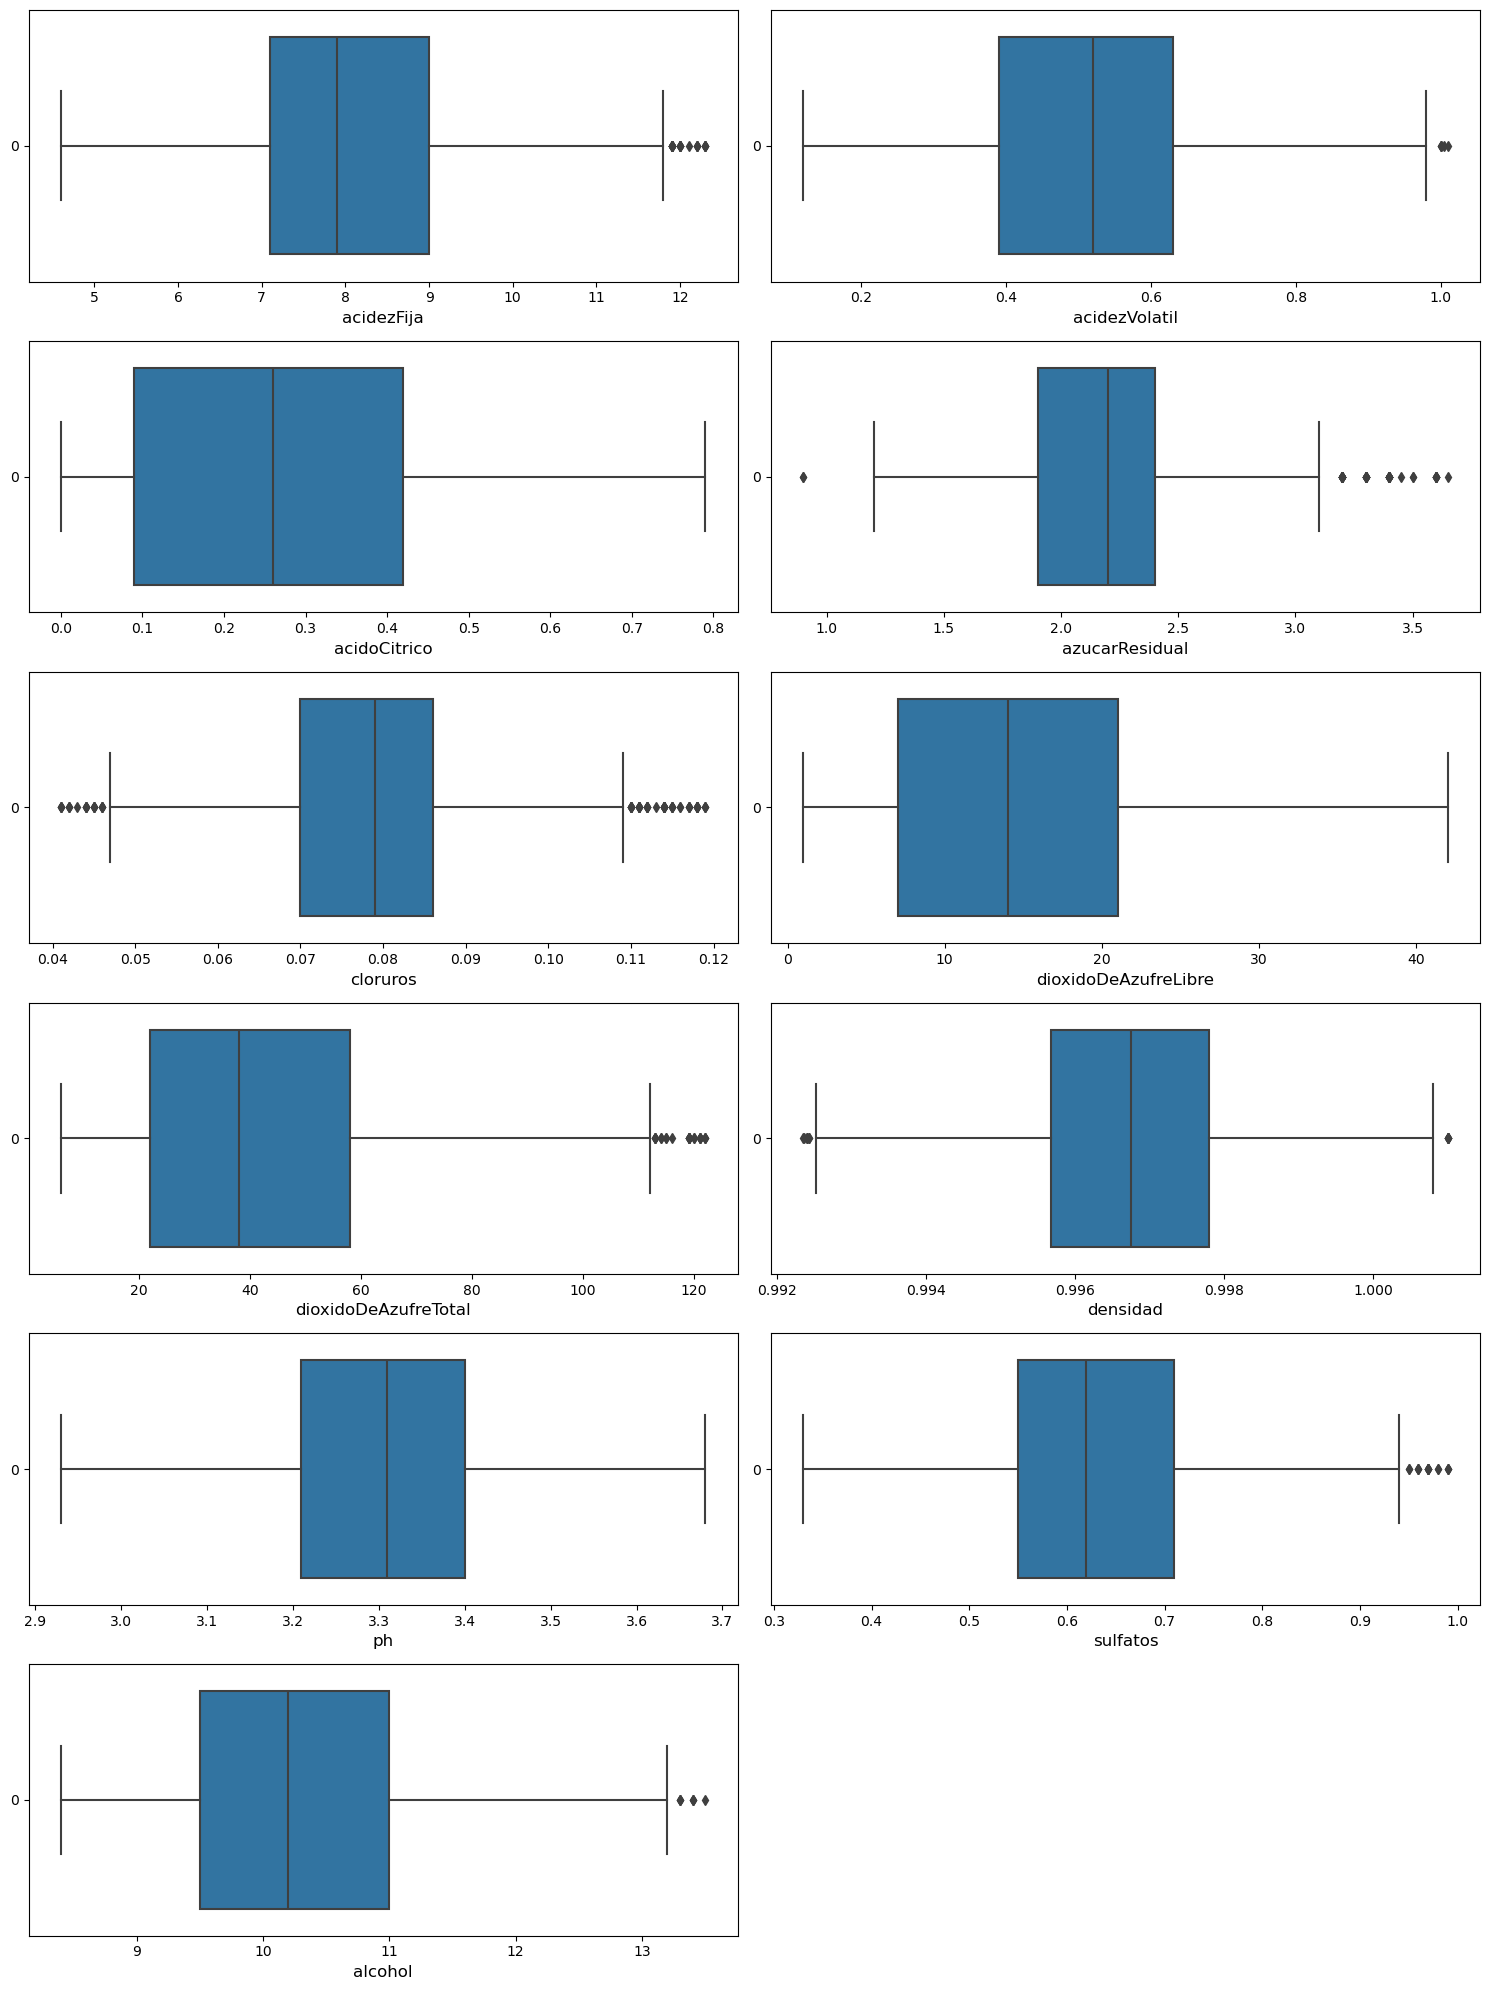

In [47]:
#Imprimimos nuevamente los diagramas para mostrar que los valores fueron tratados correctamente

fig, axs = plt.subplots(6, 2, figsize=(15, 20))  # Mantenemos la disposición de filas y columnas

# Crear boxplot para 'acidezFija'
sns.boxplot(dfVino2['acidezFija'], ax=axs[0, 0], orient='h')
axs[0, 0].set_xlabel('acidezFija', fontsize=12)  # Cambiamos a 'xlabel'

# Crear gráfico de barras para 'acidezVolatil'
sns.boxplot(dfVino2['acidezVolatil'], ax=axs[0, 1], orient='h')
axs[0, 1].set_xlabel('acidezVolatil', fontsize=12)  # Cambiamos a 'xlabel'

# Crear gráfico de barras para 'acidoCitrico'
sns.boxplot(dfVino2['acidoCitrico'], ax=axs[1, 0], orient='h')
axs[1, 0].set_xlabel('acidoCitrico', fontsize=12)  # Cambiamos a 'xlabel'

# Crear boxplot para 'azucarResidual'
sns.boxplot(dfVino2['azucarResidual'], ax=axs[1, 1], orient='h')
axs[1, 1].set_xlabel('azucarResidual', fontsize=12)  # Cambiamos a 'xlabel'

# Crear boxplot para 'cloruros'
sns.boxplot(dfVino2['cloruros'], ax=axs[2, 0], orient='h')
axs[2, 0].set_xlabel('cloruros', fontsize=12)  # Cambiamos a 'xlabel'

# Crear gráfico de barras para 'dioxidoDeAzufreLibre'
sns.boxplot(dfVino2['dioxidoDeAzufreLibre'], ax=axs[2, 1], orient='h')
axs[2, 1].set_xlabel('dioxidoDeAzufreLibre', fontsize=12)  # Cambiamos a 'xlabel'

# Crear histograma para 'dioxidoDeAzufreTotal'
sns.boxplot(dfVino2['dioxidoDeAzufreTotal'], ax=axs[3, 0], orient='h')
axs[3, 0].set_xlabel('dioxidoDeAzufreTotal', fontsize=12)  # Cambiamos a 'xlabel'

# Crear boxplot para 'densidad'
sns.boxplot(dfVino2['densidad'], ax=axs[3, 1], orient='h')
axs[3, 1].set_xlabel('densidad', fontsize=12)  # Cambiamos a 'xlabel'

# Crear gráfico de barras para 'ph'
sns.boxplot(dfVino2['ph'], ax=axs[4, 0], orient='h')
axs[4, 0].set_xlabel('ph', fontsize=12)  # Cambiamos a 'xlabel'

# Crear boxplot para 'sulfatos'
sns.boxplot(dfVino2['sulfatos'], ax=axs[4, 1], orient='h')
axs[4, 1].set_xlabel('sulfatos', fontsize=12)  # Cambiamos a 'xlabel'

# Crear histograma para 'alcohol'
sns.boxplot(dfVino2['alcohol'], ax=axs[5, 0], orient='h')
axs[5, 0].set_xlabel('alcohol', fontsize=12)  # Cambiamos a 'xlabel'

# Eliminar el último eje, ya que no se utiliza
fig.delaxes(axs[5, 1])

plt.tight_layout()
plt.show()

### 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Luego de EDA nos damos cuenta que en este modelo las columnas acidez fija y azucar residual, dado que en el analalisis se ve poca correlación, adicional azucar residual tenia una gran cantidad de datos atipicos, por ende no es confiable ni relevante

In [49]:
# Array con las columnas a eliminar
columnas_eliminar = ['azucarResidual', 'acidezFija']

# Eliminar las columnas
dfVino2 = dfVino2.drop(columns = columnas_eliminar)

In [92]:
#Confirmamos el proceso
dfVino2.head(3)

,acidezVolatil,acidoCitrico,cloruros,dioxidoDeAzufreLibre,dioxidoDeAzufreTotal,densidad,ph,sulfatos,alcohol,calidad
0,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [93]:
#Volvemos a preparar nuestras variables con el dataset listo 
predictors_col2 = ['acidezVolatil', 'acidoCitrico', 'cloruros', 'dioxidoDeAzufreLibre', 'dioxidoDeAzufreTotal','densidad','ph', 'sulfatos','alcohol']
target_col = ['calidad']

In [94]:
predictors = dfVino2[predictors_col2]
target = dfVino2[target_col]

In [168]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=357)

### 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [169]:
tree = DecisionTreeClassifier()

In [170]:
arbol = tree.fit(x_train, y_train)

[Text(0.4916895604395604, 0.9722222222222222, 'X[8] <= 10.15\ngini = 0.642\nsamples = 1279\nvalue = [9, 45, 540, 519, 152, 14]'),
 Text(0.21531593406593408, 0.9166666666666666, 'X[7] <= 0.575\ngini = 0.509\nsamples = 638\nvalue = [6, 23, 403, 192, 12, 2]'),
 Text(0.09413919413919414, 0.8611111111111112, 'X[8] <= 9.533\ngini = 0.391\nsamples = 281\nvalue = [3, 14, 213, 50, 1, 0]'),
 Text(0.05054945054945055, 0.8055555555555556, 'X[2] <= 0.076\ngini = 0.292\nsamples = 147\nvalue = [1, 4, 122, 20, 0, 0]'),
 Text(0.035897435897435895, 0.75, 'X[0] <= 0.955\ngini = 0.486\nsamples = 47\nvalue = [1, 2, 31, 13, 0, 0]'),
 Text(0.03296703296703297, 0.6944444444444444, 'X[5] <= 1.0\ngini = 0.463\nsamples = 45\nvalue = [1, 2, 31, 11, 0, 0]'),
 Text(0.02490842490842491, 0.6388888888888888, 'X[5] <= 0.997\ngini = 0.424\nsamples = 43\nvalue = [0, 2, 31, 10, 0, 0]'),
 Text(0.017582417582417582, 0.5833333333333334, 'X[1] <= 0.265\ngini = 0.514\nsamples = 29\nvalue = [0, 2, 18, 9, 0, 0]'),
 Text(0.011721

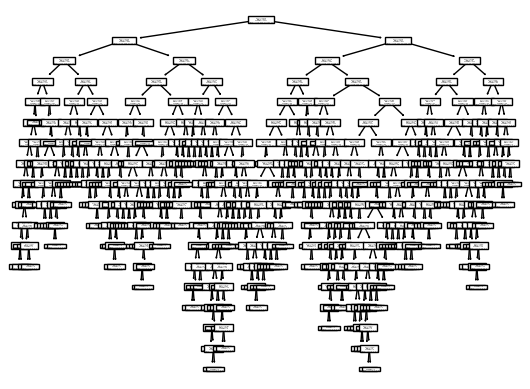

In [171]:
#Confirmamos la creación del modelo
plot_tree(arbol)

### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [172]:
# Evaluamos el modelo realizando predicciones con los datos de test
predicciones = arbol.predict(x_test)

In [173]:
#vemos las predicciones
predicciones

array([6, 6, 6, 5, 6, 5, 7, 5, 6, 5, 5, 4, 5, 5, 6, 5, 7, 5, 5, 7, 7, 6,
       6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 7, 7, 5, 6, 8, 5, 6, 7, 5, 5,
       6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 4, 5, 6, 6, 5, 7,
       5, 5, 7, 5, 6, 6, 5, 5, 7, 6, 7, 5, 7, 5, 6, 6, 5, 5, 5, 6, 7, 6,
       7, 6, 6, 6, 6, 5, 5, 4, 6, 5, 5, 6, 5, 7, 5, 6, 5, 5, 5, 7, 6, 5,
       6, 6, 6, 5, 5, 7, 6, 7, 5, 8, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 7, 6,
       6, 7, 7, 5, 6, 6, 5, 7, 6, 5, 6, 5, 6, 7, 6, 6, 6, 5, 7, 5, 6, 4,
       7, 6, 4, 6, 8, 5, 5, 5, 5, 7, 7, 5, 6, 5, 5, 3, 5, 6, 7, 6, 5, 6,
       4, 6, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 7, 7, 6, 7, 5, 6, 5, 4, 5,
       5, 5, 5, 7, 5, 6, 6, 5, 6, 7, 6, 5, 5, 5, 8, 6, 6, 6, 6, 5, 5, 5,
       7, 6, 6, 7, 6, 5, 6, 4, 5, 6, 5, 7, 5, 6, 5, 7, 6, 7, 5, 6, 6, 5,
       4, 5, 7, 5, 5, 6, 6, 6, 5, 5, 7, 6, 7, 6, 5, 5, 5, 5, 5, 5, 7, 5,
       5, 5, 6, 6, 6, 4, 5, 6, 5, 5, 7, 6, 5, 6, 6,

In [207]:
# Revisaremos las metricas para calcular la exactitud del modelo
exactitud = accuracy_score(y_test, predicciones)

print("Exactitud:", exactitud)

Exactitud: 0.590625


In [210]:
#Veremos la precisión del modelo para cada una de las clases del mismo
precision_clase_3 = precision_score(y_true, predicciones, labels=[3], average=None)
precision_clase_4 = precision_score(y_true, predicciones, labels=[4], average=None)
precision_clase_5 = precision_score(y_true, predicciones, labels=[5], average=None)
precision_clase_6 = precision_score(y_true, predicciones, labels=[6], average=None)
precision_clase_7 = precision_score(y_true, predicciones, labels=[7], average=None)
precision_clase_8 = precision_score(y_true, predicciones, labels=[8], average=None)
print("Precisión para la clase 3:", precision_clase_3)
print("Precisión para la clase 4:", precision_clase_4)
print("Precisión para la clase 5:", precision_clase_5)
print("Precisión para la clase 6:", precision_clase_6)
print("Precisión para la clase 7:", precision_clase_7)
print("Precisión para la clase 8:", precision_clase_8)

Precisión para la clase 3: [0.]
Precisión para la clase 4: [0.09090909]
Precisión para la clase 5: [0.41353383]
Precisión para la clase 6: [0.384]
Precisión para la clase 7: [0.06521739]
Precisión para la clase 8: [0.]


In [212]:
#Revisaremos el recall de cada una de las clases
recall_clase_3 = recall_score(y_true, predicciones, labels=[3], average=None)
recall_clase_4 = recall_score(y_true, predicciones, labels=[4], average=None)
recall_clase_5 = recall_score(y_true, predicciones, labels=[5], average=None)
recall_clase_6 = recall_score(y_true, predicciones, labels=[6], average=None)
recall_clase_7 = recall_score(y_true, predicciones, labels=[7], average=None)
recall_clase_8 = recall_score(y_true, predicciones, labels=[8], average=None)
print("Recall para la clase 3:", recall_clase_3)
print("Recall para la clase 4:", recall_clase_4)
print("Recall para la clase 5:", recall_clase_5)
print("Recall para la clase 6:", recall_clase_6)
print("Recall para la clase 7:", recall_clase_7)
print("Recall para la clase 8:", recall_clase_8)

Recall para la clase 3: [0.]
Recall para la clase 4: [0.09090909]
Recall para la clase 5: [0.38461538]
Recall para la clase 6: [0.38095238]
Recall para la clase 7: [0.08108108]
Recall para la clase 8: [0.]


C:\Users\Camilo\anaconda3\envs\ArbolDecision_Grupo47\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
#Revisamos ahora el F1 score para cada una de las clases
f1_clase_3 = f1_score(y_true, predicciones, labels=[3], average=None)
f1_clase_4 = f1_score(y_true, predicciones, labels=[4], average=None)
f1_clase_5 = f1_score(y_true, predicciones, labels=[5], average=None)
f1_clase_6 = f1_score(y_true, predicciones, labels=[6], average=None)
f1_clase_7 = f1_score(y_true, predicciones, labels=[7], average=None)
f1_clase_8 = f1_score(y_true, predicciones, labels=[8], average=None)
print("F1-score para la clase 3:", f1_clase_3)
print("F1-score para la clase 4:", f1_clase_4)
print("F1-score para la clase 5:", f1_clase_5)
print("F1-score para la clase 6:", f1_clase_6)
print("F1-score para la clase 7:", f1_clase_7)
print("F1-score para la clase 8:", f1_clase_8)

F1-score para la clase 3: [0.]
F1-score para la clase 4: [0.09090909]
F1-score para la clase 5: [0.39855072]
F1-score para la clase 6: [0.38247012]
F1-score para la clase 7: [0.07228916]
F1-score para la clase 8: [0.]


### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [192]:
# Examinamos la matriz de confución
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,0,0,0
4,1,0,4,2,1,0
5,0,3,93,38,7,0
6,0,6,30,70,11,2
7,0,2,5,14,25,1
8,0,0,0,1,2,1


### 8. Interpretar, analizar y documentar los resultados obtenidos

Podemos observar que en este caso el modelo no es muy exacto (0.59), esto era algo que ya se estaba visualizando desde el análisis de datos, dado que los datos estaban desbalanceados, adicional no estaban normalizados, una forma de poder mejorar este modelo es agrupar la calidad en solo dos estados(vinos buenos y vinos malos), lo cual permitirá reducir la cantidad de clases de clasificación y trabajar de manera óptima con datos tan desbalanceados como los del dataset, al formar un grupo con los datos que tienen muy pocas muestras como clase 3 y clase 8.

La precisión fue muy baja, incluso en las dos clases con gran cantidad de muestras, el modelo solo fue capaz de lograr un máximo de 41% de precisión en la clase 5, de vinos, esto nos indica nuevamente que el modelo está desbalanceado, adicional se debe tener en cuenta que el proceso de tratar los datos atípicos fue realizado con reemplazo a la media, puede que se hubieran obtenido mejores resultados con métodos como K-vecinos.

El recall mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo. Es decir, de todas las instancias que son realmente positivas, cuantas fueron identificadas por el modelo, en este caso vemos que los valores mayores son del 38% para las clases 5 y 6, que tenían la mayor cantidad de muestras.

Con F1 score nos muestra que efectivamente nuestro modelo no es muy bueno clasificando los resultados, en las categorías 5 y 6 muestra que hay un desempeño moderado, pero solo del 38%, este puede mejorar teniendo en cuenta las propuestas de disminución de clases y mejora de tratamiento de los valores atípicos.

Se puede concluir que el modelo de árbol de decisión no es la mejor opción para este dataset, se tendría que trabajar con los datos y cambiar las clases reducir las posibilidades y equilibrar los datos, además se podrían eliminar más variables que parecen no aportar mucho a la calidad del vino y que pueden entorpecer el modelo al agregar información poco relevante.